In [1]:
import numpy as np

In [2]:
commitee_pred = np.load("13C_commitee_prediction.npy")
reference = np.load("13C_reference_shifts.npy")
binary_encoded = np.load("13C_Binary_encoded_in_validation_set_1_else_0.npy")
commitee_pred_test = np.load("13C_test_commitee_prediction.npy")
test_reference_shift = np.load("13C_test_reference_shifts.npy")
train_1hot = np.load("13C_train_binary_1_hot_N_sample_M_models.npy")

In [3]:
train_1hot

array([[False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False,  True, ..., False,  True,  True],
       [False, False,  True, ..., False,  True,  True],
       [False, False,  True, ..., False,  True,  True]])

In [3]:
min5 = np.sum(train_1hot.astype("int"),axis=1) < 12


In [4]:
cleaned_pred = commitee_pred[min5]
cleaned_pred[train_1hot[min5]] = np.NaN



In [6]:
cleaned_pred.shape

(48342, 16)

In [5]:
means = np.nanmean(cleaned_pred,axis=1)
nvars = np.nanvar(cleaned_pred,axis=1)

#np.sqrt(np.mean( (means - reference[min5]) ** 2 / nvars))

In [3]:
cleaned_pred = commitee_pred
cleaned_pred[train_1hot] = np.NaN
means = np.nanmean(cleaned_pred,axis=1)
nvars = np.nanvar(cleaned_pred,axis=1)
nstd = np.nanstd(cleaned_pred,axis=1)

/tmp/ipykernel_35355/2902420616.py:3: RuntimeWarning: Mean of empty slice
  means = np.nanmean(cleaned_pred,axis=1)
/tmp/ipykernel_35355/2902420616.py:4: RuntimeWarning: Degrees of freedom <= 0 for slice.
  nvars = np.nanvar(cleaned_pred,axis=1)
/home/kellner/anaconda3/envs/python38/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [7]:
nstd = np.nanstd(cleaned_pred,axis=1)

In [4]:
means_test = np.nanmean(commitee_pred_test,axis=1)
nvars_test = np.nanvar(commitee_pred_test,axis=1)
nstd_test = np.nanstd(commitee_pred_test,axis=1)

In [12]:
np.mean(np.abs(means_test - test_reference_shift) >  5.340778967043847 * 3 * nstd_test) * 100

0.4674680404502958

In [9]:
from scipy.stats import norm

In [10]:
import matplotlib.pyplot as plt

In [19]:
means.shape

(134692,)

In [12]:
cleaned_pred.shape

(134692, 16)

In [13]:
means.shape

(134692,)

In [14]:
means[min5].shape

(48342,)

In [30]:
error_dist = np.abs(means[min5].reshape(-1,1) + 6.3 * (cleaned_pred[min5]-means[min5].reshape(-1,1)) - reference[min5].reshape(-1,1)).flatten()

In [29]:
error_dist.shape

(48342, 16)

In [11]:
(mu, sigma) = norm.fit(reference[min5]-means[min5])

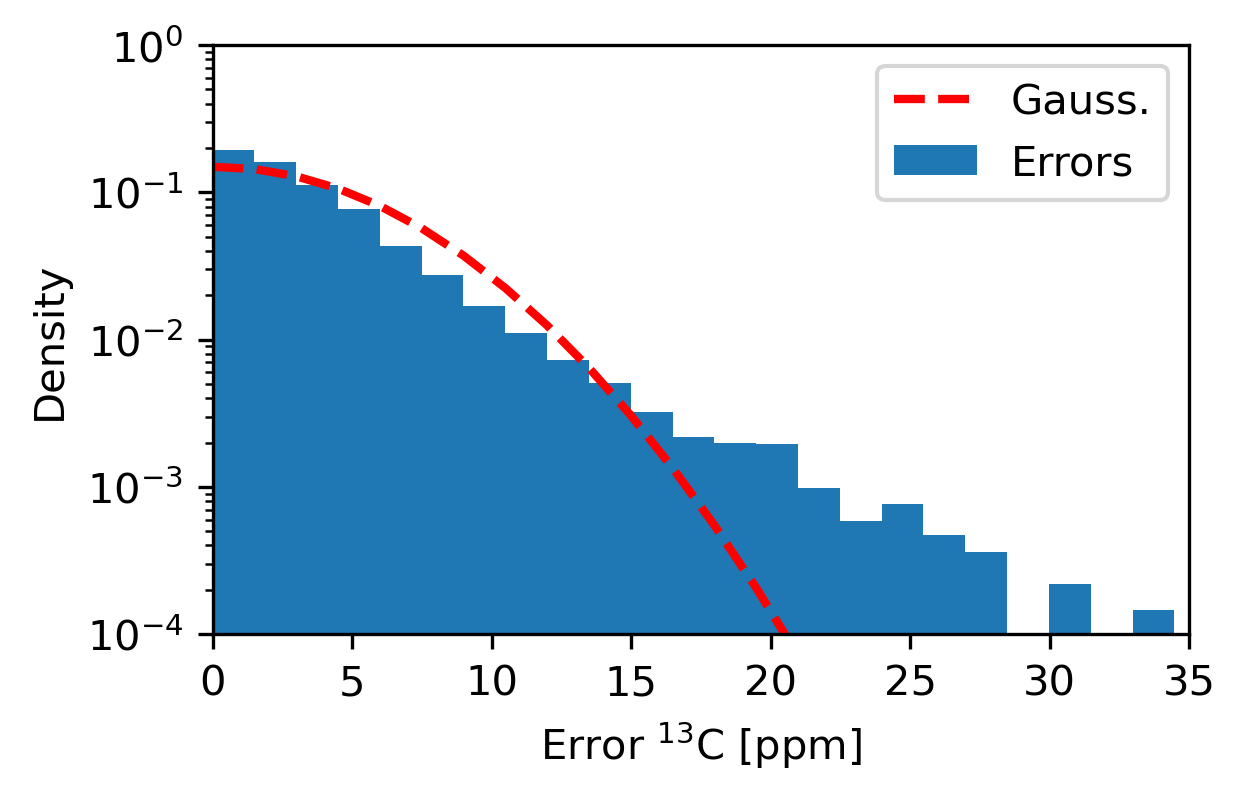

In [17]:
plt.figure(figsize=(4.2,2.6),dpi=300)
n, bins, patches = plt.hist(np.abs(means[min5] - reference[min5]),bins=50,log=True,density=True)
#_ = plt.hist(error_dist,bins=50,log=True,density=True,alpha=0.3)
y = norm.pdf( bins, mu, sigma) * 2
l = plt.plot(bins[:40], y[:40], 'r--', linewidth=2)
#_ = plt.hist(6.33*nstd,bins=40,log=True,density=True,alpha=0.3)
#_ = plt.hist(,bins=50,log=True,density=True)
plt.xlim(0,35)
plt.ylim(1e-04,1)
plt.ylabel("Density")
plt.xlabel("Error $^{13}$C [ppm]")
plt.legend(labels=["Gauss.","Errors"])
plt.savefig(,dpi=300,bbox_inches="tight")

In [66]:
n[0]

1.8207047951924866

In [31]:
n

array([1.78585406e+00, 1.55953564e+00, 1.24563321e+00, 9.36911954e-01,
       6.20253572e-01, 4.24746648e-01, 2.75043573e-01, 1.73073511e-01,
       1.15804919e-01, 7.56232028e-02, 4.78432507e-02, 3.14729219e-02,
       1.82443733e-02, 1.35592623e-02, 1.11891474e-02, 7.38593963e-03,
       3.85832667e-03, 4.96070572e-03, 3.74808877e-03, 1.98428229e-03,
       1.98428229e-03, 1.21261695e-03, 6.61427430e-04, 2.20475810e-04,
       7.71665335e-04, 8.81903239e-04, 4.40951620e-04, 9.92141144e-04,
       0.00000000e+00, 6.61427430e-04, 6.61427430e-04, 4.40951620e-04,
       6.61427430e-04, 4.40951620e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40951620e-04])

In [ ]:
n, bins, patches = plt.hist(true_vals_missing_five[specie]-means_missing_five[specie],bins=300, density=True)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

In [ ]:
#1H 6.3299182108964045
#13C 5.340778967043847
#15N 4.9891876429312605
#17O 4.570059189333062